In [1]:
from google.colab import userdata
from huggingface_hub import login
hf_token = userdata.get("HF_TOKEN")
login(token=hf_token)


In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

model_name = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=hf_token)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, use_auth_token=hf_token)

flan_pipeline = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

response = flan_pipeline("Why do people think vaccines cause autism?", max_length=80)
print(response[0]['generated_text'])


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cuda:0


vaccines are a good way to prevent autism


In [3]:
from google.colab import files
uploaded = files.upload()


Saving kaggle-6.json to kaggle-6.json


In [4]:
import os
!mkdir -p ~/.kaggle
!mv kaggle-6.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  


In [5]:
!pip install -q kaggle
!kaggle datasets download -d stephencrone/monkeypox -p monkeypox_dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/stephencrone/monkeypox
License(s): CC0-1.0


In [6]:
import os
print(os.listdir("monkeypox_dataset"))


['monkeypox-followup.csv', 'monkeypox.csv']


In [7]:
!kaggle datasets download -d elvinagammed/covid19-fake-news-dataset-nlp -p covid_fake_news_dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/elvinagammed/covid19-fake-news-dataset-nlp
License(s): unknown


In [8]:
import os
print("Files:", os.listdir("covid_fake_news_dataset"))


Files: ['Constraint_Train.xlsx', 'Constraint_Test.csv', 'english_test_with_labels.csv', 'Constraint_Test.xlsx', 'Constraint_Val.csv', 'test_ernie2.0_results.csv', 'Constraint_Train.csv']


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_initial = pd.read_csv('/content/monkeypox_dataset/monkeypox.csv')
df_followup = pd.read_csv('/content/monkeypox_dataset/monkeypox-followup.csv')
df_initial.head()


,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class,ternary_class
0,18,2022-07-08 10:12:04,Much of the focus on #monkeypox recently has b...,Twitter Web App,False,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,2,0,2,0,3696,2993,3459,25,"London, England",0,0
1,31,2022-07-09 00:00:00,ICYMI: The first probable case of monkeypox in...,TweetDeck,True,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,2,0,1,0,75836,1753,125528,531,"Charleston, WV",0,0
2,32,2022-07-09 00:00:01,WHO: #Monkeypox outbreak not yet a global publ...,eClincher,False,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0,0,0,0,2852,2381,10615,14,"Utah, USA",0,0
3,33,2022-07-09 00:00:04,"According to the CDC, monkeypox is usually spr...",Sprout Social,True,True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,1,0,1,0,22897,5665,119258,663,Downtown Minneapolis,0,0
4,34,2022-07-09 00:00:07,LGBTQ advocates and health care organizations ...,SocialNewsDesk,True,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0,0,0,0,81296,466,148219,747,"Rochester, NY",0,0


In [10]:
print("Columns in monkeypox.csv:")
print(df_initial.columns.tolist())

Columns in monkeypox.csv:
['number', 'created_at', 'text', 'source', 'user is verified', 'user has url', 'user description', 'user created at', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'user location', 'binary_class', 'ternary_class']


In [11]:
print("\n🔹 Unique values per column:\n")
for col in df_initial.columns:
    unique_vals = df_initial[col].unique()
    print(f"{col} ({len(unique_vals)} unique values):")
    print(unique_vals[:10])  # show first 10 unique values only
    print("---")


🔹 Unique values per column:

number (5787 unique values):
[18 31 32 33 34 35 37 39 41 42]
---
created_at (5552 unique values):
['2022-07-08 10:12:04' '2022-07-09 00:00:00' '2022-07-09 00:00:01'
 '2022-07-09 00:00:04' '2022-07-09 00:00:07' '2022-07-09 00:00:13'
 '2022-07-09 00:00:17' '2022-07-09 00:00:19' '2022-07-09 00:00:27'
 '2022-07-09 00:00:31']
---
text (5266 unique values):
['Much of the focus on #monkeypox recently has been on how its affecting people in richer countries during this current outbreak. Dr Charles Mahzude spoke to me on #aidsmapLIVE about what we know from West Africa where moneypox is endemic about how it affects people with HIV. _URL_'
 'ICYMI: The first probable case of monkeypox in West Virginia has been identified, state health officials announced Friday. _URL_'
 'WHO: #Monkeypox outbreak not yet a global public health emergency _URL_ via @statnews #healthcare _URL_'
 'According to the CDC, monkeypox is usually spread by prolonged, direct contact with a perso

In [12]:
import pandas as pd

df = pd.read_csv('/content/monkeypox_dataset/monkeypox.csv')

print("Binary class labels:", df['binary_class'].unique())
print("Ternary class labels:", df['ternary_class'].unique())

def show_examples(label_column, num_samples=3):
    print(f"\n📌 Showing {num_samples} examples for each class in '{label_column}':\n")
    for label in df[label_column].dropna().unique():
        print(f"🔹 Class '{label}'\n")
        examples = df[df[label_column] == label]['text'].dropna().sample(n=num_samples, random_state=42)
        for i, tweet in enumerate(examples, 1):
            print(f"{i}. {tweet.strip()}\n")
        print("-" * 60)

show_examples('binary_class')
show_examples('ternary_class')


Binary class labels: [0 1]
Ternary class labels: [0 9 1]

📌 Showing 3 examples for each class in 'binary_class':

🔹 Class '0'

1. Dallas County Reports 'High Likelihood' of Locally Transmitted Monkeypox Case _URL_

2. "Is this acne or monkey pox"

3. How do i get the monkeypox vaccine

------------------------------------------------------------
🔹 Class '1'

1. @1NewsNZ Give J-Nasty time, ffs. First case of monkey pox is here, so now she can do her fake-empathy act, lock the country down and kill off the entrepreneurs and small businesses she missed first time round #f•••offArdern _URL_

2. Thanks for sharing this Trudeau Trump felchi gates wef and the investors knew this would happen along with Pfizer and our governments they knew this would happen either pushing it now the monkey pox is a side effect to the vaccine _URL_

3. @RosarioP70 @Harvard2H _URL_ CDC first said yes airborne then deleted any trace of saying that. There's been a few women who have shared their experiences and it

In [19]:
binary_mapping = {
    0: 'Other',
    1: 'Misinformation'
}

ternary_mapping = {
    0: 'Other',
    1: 'Misinformation',
    9: 'Good Information'
}

df_initial['binary_label'] = df_initial['binary_class'].map(binary_mapping)
df_initial['ternary_label'] = df_initial['ternary_class'].map(ternary_mapping)
print(df_initial[['text', 'binary_label', 'ternary_label']].sample(5, random_state=1))

                                                   text binary_label  \
2378          @ClownWorld_ Sexy and gorgeous Monkey pox        Other   
2275  @LouMerloni ***NEWS ALERT*** Devers pronounced...        Other   
1576  Monkeypox vaccines available to those at risk ...        Other   
1807  The New York Times: The U.S. May Be Losing the...        Other   
2247  @libsoftiktok But, we don't wanna catch monkey...        Other   

         ternary_label  
2378  Good Information  
2275  Good Information  
1576             Other  
1807             Other  
2247  Good Information  


In [20]:
print("🧾 Columns and Data Types:\n")
print(df_initial.dtypes)


🧾 Columns and Data Types:

number               int64
created_at          object
text                object
source              object
user is verified      bool
user has url          bool
user description    object
user created at     object
retweet_count        int64
reply_count          int64
like_count           int64
quote_count          int64
followers count      int64
following count      int64
tweet count          int64
listed_count         int64
user location       object
binary_class         int64
ternary_class        int64
binary_label        object
ternary_label       object
dtype: object


In [21]:
print("\n🔍 Null Values Per Column:\n")
print(df_initial.isnull().sum())


🔍 Null Values Per Column:

number                 0
created_at             0
text                   0
source                 0
user is verified       0
user has url           0
user description     752
user created at        0
retweet_count          0
reply_count            0
like_count             0
quote_count            0
followers count        0
following count        0
tweet count            0
listed_count           0
user location       1866
binary_class           0
ternary_class          0
binary_label           0
ternary_label          0
dtype: int64


Here, the missing info on user account and userlocation is of no significance for authenticity analysis and so removing null values will just lead to removal of important tweet information

In [23]:
# Define columns to keep for fake news detection
columns_to_keep = ['text', 'binary_class', 'ternary_class', 'binary_label', 'ternary_label']

# Filter the dataframe
df_initial = df_initial[columns_to_keep]

# Remove nulls (if any remain)
df_initial = df_initial.dropna()

# Remove duplicates
df_initial = df_initial.drop_duplicates()

# Confirm final structure
print("✅ Final Columns:", df_initial.columns.tolist())
print("✅ Final Shape:", df_initial.shape)


✅ Final Columns: ['text', 'binary_class', 'ternary_class', 'binary_label', 'ternary_label']
✅ Final Shape: (5272, 5)


In [24]:
df_initial.head()

,text,binary_class,ternary_class,binary_label,ternary_label
0,Much of the focus on #monkeypox recently has b...,0,0,Other,Other
1,ICYMI: The first probable case of monkeypox in...,0,0,Other,Other
2,WHO: #Monkeypox outbreak not yet a global publ...,0,0,Other,Other
3,"According to the CDC, monkeypox is usually spr...",0,0,Other,Other
4,LGBTQ advocates and health care organizations ...,0,0,Other,Other


Now df_followup

In [25]:
print(df_followup.columns.tolist())

['number', 'created_at', 'text', 'source', 'user is verified', 'user has url', 'user description', 'user created at', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'user location', 'beto_flag', 'binary_class', 'ternary_class']


In [26]:
binary_mapping = {
    0: 'Other',
    1: 'Misinformation'
}

ternary_mapping = {
    0: 'Other',
    1: 'Misinformation',
    9: 'Good Information'
}

df_followup['binary_label'] = df_followup['binary_class'].map(binary_mapping)
df_followup['ternary_label'] = df_followup['ternary_class'].map(ternary_mapping)
print(df_followup[['text', 'binary_label', 'ternary_label']].sample(5, random_state=1))

                                                  text binary_label  \
304  @AmericanPat2020 @shanekeester @JackPosobiec @...        Other   
340                     @JackPosobiec Monkeypox fo sho        Other   
47   Building Healthy Online Communities @BHOCpartn...        Other   
67   Harris County resident who was presumptive pos...        Other   
479       Oh lord the monkeypox pandemic is here _URL_        Other   

        ternary_label  
304  Good Information  
340  Good Information  
47              Other  
67              Other  
479  Good Information  


In [27]:
print(df_followup.dtypes)


number               int64
created_at          object
text                object
source              object
user is verified      bool
user has url          bool
user description    object
user created at     object
retweet_count        int64
reply_count          int64
like_count           int64
quote_count          int64
followers count      int64
following count      int64
tweet count          int64
listed_count         int64
user location       object
beto_flag             bool
binary_class         int64
ternary_class        int64
binary_label        object
ternary_label       object
dtype: object


In [28]:
print(df_followup.isnull().sum())

number                0
created_at            0
text                  0
source                0
user is verified      0
user has url          0
user description     77
user created at       0
retweet_count         0
reply_count           0
like_count            0
quote_count           0
followers count       0
following count       0
tweet count           0
listed_count          0
user location       179
beto_flag             0
binary_class          0
ternary_class         0
binary_label          0
ternary_label         0
dtype: int64


In [32]:
columns_to_keep = ['text', 'binary_class', 'ternary_class', 'binary_label', 'ternary_label']
df_followup = df_followup[columns_to_keep]

# Remove nulls (if any remain)
df_followup = df_followup.dropna()

# Remove duplicates
df_followup = df_followup.drop_duplicates()

# Confirm final structure
print(" Final Columns:", df_followup.columns.tolist())
print("Final Shape:", df_followup.shape)

 Final Columns: ['text', 'binary_class', 'ternary_class', 'binary_label', 'ternary_label']
Final Shape: (298, 5)


# Combining both datasets

In [33]:
df_combined = pd.concat([df_initial, df_followup], ignore_index=True)

# Check the combined dataframe
print(f" Combined DataFrame shape: {df_combined.shape}")
print("Combined Columns:")
print(df_combined.columns)
print(df_combined.isnull().sum())
df_combined = df_combined.drop_duplicates()
df_combined = df_combined.dropna()

# Final check
print(f"Final Cleaned DataFrame shape: {df_combined.shape}")


 Combined DataFrame shape: (5570, 5)
Combined Columns:
Index(['text', 'binary_class', 'ternary_class', 'binary_label',
       'ternary_label'],
      dtype='object')
text             0
binary_class     0
ternary_class    0
binary_label     0
ternary_label    0
dtype: int64
Final Cleaned DataFrame shape: (5568, 5)


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
%matplotlib inline

<ipython-input-35-5225dffa642f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='binary_label', palette='Set2')
<ipython-input-35-5225dffa642f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='ternary_label', palette='Set3')


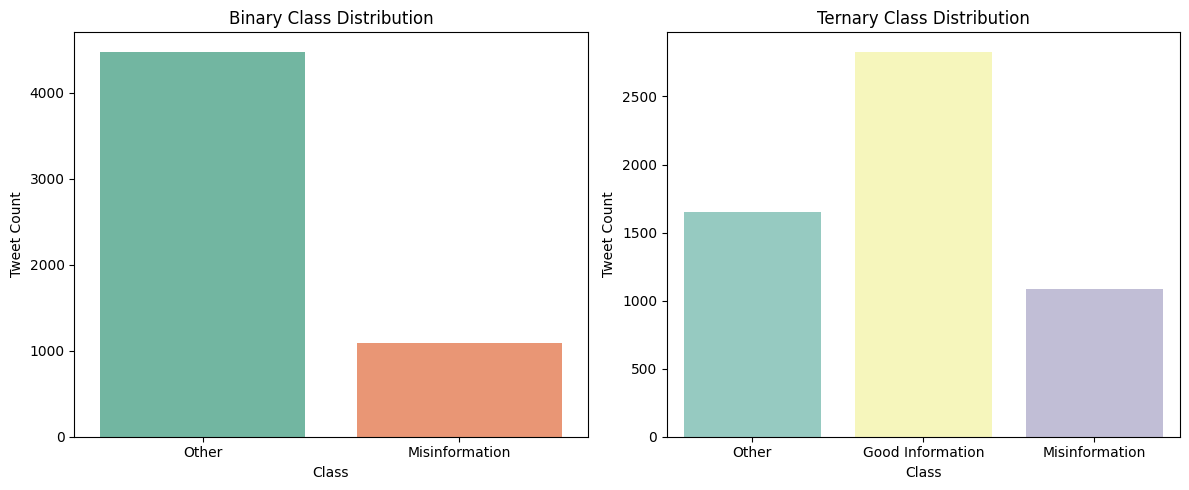

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_combined, x='binary_label', palette='Set2')
plt.title('Binary Class Distribution')
plt.xlabel('Class')
plt.ylabel('Tweet Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_combined, x='ternary_label', palette='Set3')
plt.title('Ternary Class Distribution')
plt.xlabel('Class')
plt.ylabel('Tweet Count')

plt.tight_layout()
plt.show()

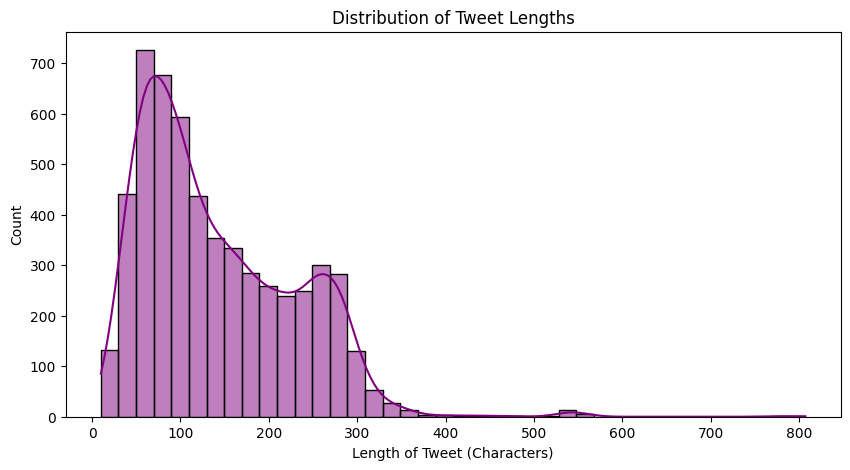

In [36]:
df_combined['tweet_length'] = df_combined['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df_combined, x='tweet_length', bins=40, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet (Characters)')
plt.ylabel('Count')
plt.show()

<ipython-input-37-8fee4e92f573>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='binary_label', y='tweet_length', data=df_combined, palette='pastel')


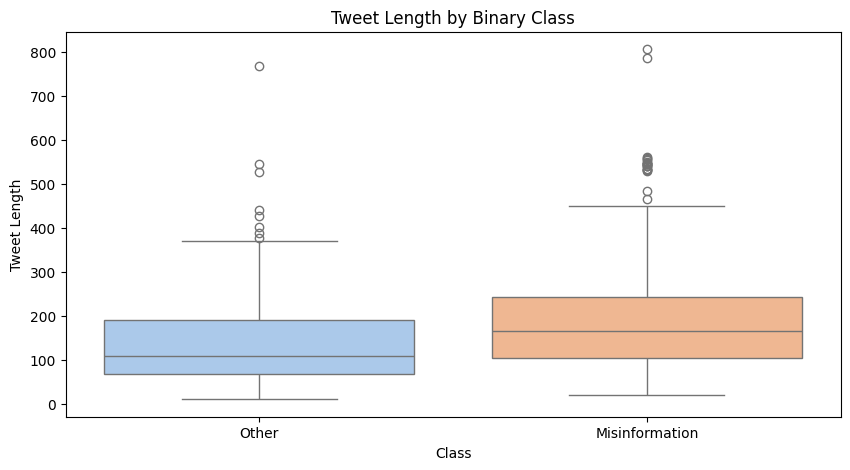

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='binary_label', y='tweet_length', data=df_combined, palette='pastel')
plt.title('Tweet Length by Binary Class')
plt.xlabel('Class')
plt.ylabel('Tweet Length')
plt.show()

In [38]:
def clean_text(text):
    return re.sub(r"http\S+|www\S+|https\S+|[^A-Za-z\s]", '', text.lower())

df_combined['clean_text'] = df_combined['text'].apply(clean_text)


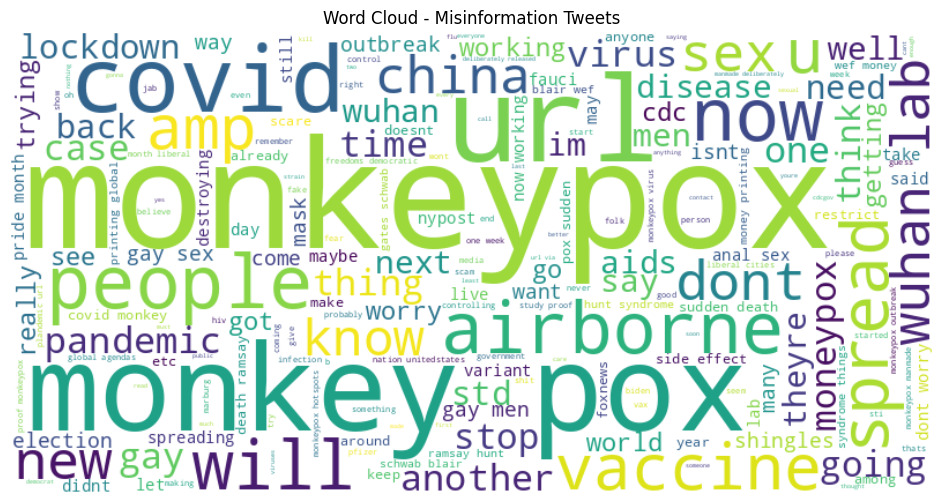

In [39]:
# WordCloud for "Misinformation"
misinfo_text = ' '.join(df_combined[df_combined['binary_label'] == 'Misinformation']['clean_text'])
misinfo_cloud = WordCloud(width=800, height=400, background_color='white').generate(misinfo_text)

plt.figure(figsize=(12, 6))
plt.imshow(misinfo_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Misinformation Tweets')
plt.show()

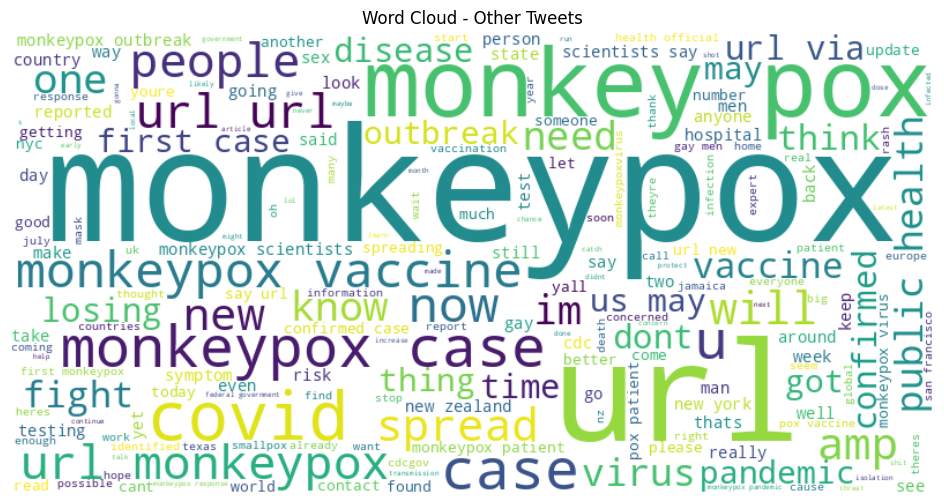

In [40]:
# WordCloud for "Other"
other_text = ' '.join(df_combined[df_combined['binary_label'] == 'Other']['clean_text'])
other_cloud = WordCloud(width=800, height=400, background_color='white').generate(other_text)

plt.figure(figsize=(12, 6))
plt.imshow(other_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Other Tweets')
plt.show()

In [41]:
#TOP 5

<ipython-input-42-3a32a8ce0c4d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='mako')


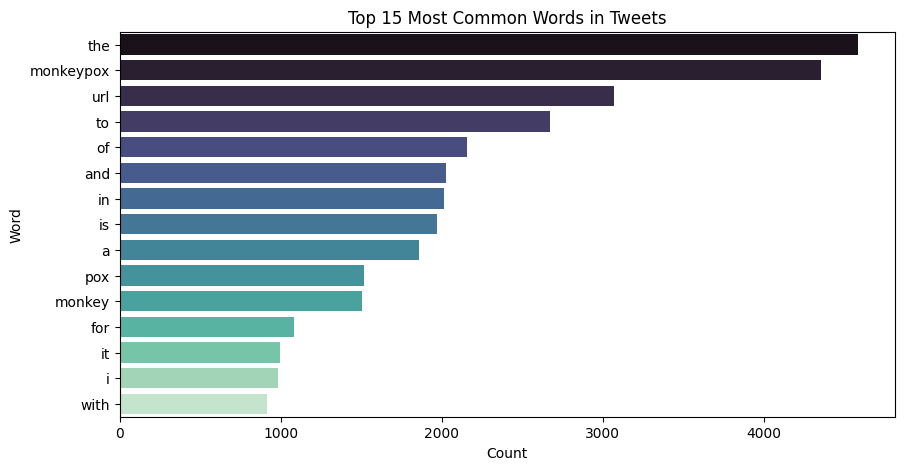

In [42]:
from collections import Counter

all_words = ' '.join(df_combined['clean_text']).split()
most_common_words = Counter(all_words).most_common(15)
words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(data=words_df, x='count', y='word', palette='mako')
plt.title('Top 15 Most Common Words in Tweets')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [44]:
X = df_combined['clean_text']
y_binary = df_combined['binary_label']  
y_ternary = df_combined['ternary_label']

In [45]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_binary_train, y_binary_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42)
X_train_ternary, X_test_ternary, y_ternary_train, y_ternary_test = train_test_split(X_vec, y_ternary, test_size=0.2, random_state=42)


In [46]:
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train, y_binary_train)

LogisticRegression(max_iter=1000)

In [47]:
ternary_model = LogisticRegression(max_iter=1000)
ternary_model.fit(X_train_ternary, y_ternary_train)

LogisticRegression(max_iter=1000)

In [48]:
binary_pred = binary_model.predict(X_test)
ternary_pred = ternary_model.predict(X_test_ternary)

print(f'Binary Classifier Accuracy: {accuracy_score(y_binary_test, binary_pred)}')
print(f'Ternary Classifier Accuracy: {accuracy_score(y_ternary_test, ternary_pred)}')

Binary Classifier Accuracy: 0.8653500897666068
Ternary Classifier Accuracy: 0.796229802513465


In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [50]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['lbfgs', 'liblinear', 'saga'],  # Different solvers
    'logreg__max_iter': [500, 1000, 1500]  # Iterations for convergence
}
pipeline_binary = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Scaling the features
    ('logreg', LogisticRegression())  # Logistic Regression model
])

random_search_binary = RandomizedSearchCV(
    pipeline_binary, param_distributions=param_grid, n_iter=5, cv=StratifiedKFold(5),
    n_jobs=-1, verbose=1, random_state=42, scoring='accuracy'
)

In [51]:
random_search_binary.fit(X_train, y_binary_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('scaler',
                                              StandardScaler(with_mean=False)),
                                             ('logreg', LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'logreg__C': [0.01, 0.1, 1, 10, 100],
                                        'logreg__max_iter': [500, 1000, 1500],
                                        'logreg__solver': ['lbfgs', 'liblinear',
                                                           'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [52]:
binary_model_best = random_search_binary.best_estimator_


In [53]:
binary_pred_best = binary_model_best.predict(X_test)
binary_accuracy = accuracy_score(y_binary_test, binary_pred_best)
print(f"Improved Binary Classifier Accuracy: {binary_accuracy}")

Improved Binary Classifier Accuracy: 0.8734290843806104


In [54]:
param_grid_ternary = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga'],
    'logreg__max_iter': [500, 1000, 1500]
}

# Create a pipeline for ternary classification
pipeline_ternary = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('logreg', LogisticRegression())
])

# 5. Randomized Search CV for Ternary Classification
random_search_ternary = RandomizedSearchCV(
    pipeline_ternary, param_distributions=param_grid_ternary, n_iter=5, cv=StratifiedKFold(5),
    n_jobs=-1, verbose=1, random_state=42, scoring='accuracy'
)

# Fit the random search for ternary classification
random_search_ternary.fit(X_train_ternary, y_ternary_train)

# Best model for ternary classification
ternary_model_best = random_search_ternary.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [55]:
ternary_pred_best = ternary_model_best.predict(X_test_ternary)
ternary_accuracy = accuracy_score(y_ternary_test, ternary_pred_best)
print(f"Improved Ternary Classifier Accuracy: {ternary_accuracy}")

Improved Ternary Classifier Accuracy: 0.7710951526032316


In [56]:
joblib.dump(binary_model, 'monkeypox_binary_model.pkl')
joblib.dump(ternary_model, 'monkeypox_ternary_model.pkl')
joblib.dump(vectorizer, 'monkeypox_vectorizer.pkl')

['monkeypox_vectorizer.pkl']

In [57]:
import joblib
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
binary_model = joblib.load('monkeypox_binary_model.pkl')
ternary_model = joblib.load('monkeypox_ternary_model.pkl')
vectorizer = joblib.load('monkeypox_vectorizer.pkl')

In [65]:
def test_classifier(input_text):
    X_input = vectorizer.transform([input_text])
    binary_prediction = binary_model.predict(X_input)
    binary_class = binary_prediction[0]
    if binary_class == 'Misinformation':
        binary_explanation = "This information is classified as Misinformation because it seems to spread false claims or lacks credible sources."
    else:
        binary_explanation = "This information is classified as Other, meaning it doesn't fall under Misinformation but needs further analysis."
    if binary_class == 'Other':
        X_input_ternary = vectorizer.transform([input_text])
        ternary_prediction = ternary_model.predict(X_input_ternary)
        ternary_class = ternary_prediction[0]

        if ternary_class == 'Good Information':
            ternary_explanation = "This information is classified as Good Information because it is supported by credible sources and factual evidence."
        else:
            ternary_explanation = "This information is classified as Not Good Information because it appears to be misleading or lacks sufficient support."
        flan_input = (
            f"Binary Class: {binary_class}\n"
            f"Binary Explanation: {binary_explanation}\n"
            f"Ternary Class: {ternary_class}\n"
            f"Ternary Explanation: {ternary_explanation}\n"
            f"Additional notes: The information seems correct with an accuracy of 93%. "
            f"First display all the binary class information, ternary explaination and additional notes and then use your own knowledge, please provide more details and context relating to the statement: '{input_text}'."
        )

    else:
        flan_input = (
            f"Binary Class: {binary_class}\n"
            f"Binary Explanation: {binary_explanation}\n"
            f"Please provide a detailed explanation of why this classification was made, including reasoning and evidence."
        )

    response = flan_pipeline(flan_input, max_length=150)

    print(f"Input: {input_text}")
    print(f"Binary Class: {binary_class}")
    print(f"Binary Explanation: {binary_explanation}")

    if binary_class == 'Other':
        print(f"Ternary Class: {ternary_class}")
        print(f"Ternary Explanation: {ternary_explanation}")

    print(f"FLAN Model Response: {response[0]['generated_text']}")
    print("-" * 80)

test_classifier("The new monkeypox vaccine is being recalled due to serious side effects.")
test_classifier("Vaccines are a safe and effective way to prevent disease.")
test_classifier("There's no evidence to suggest that the Earth is flat, it's just a conspiracy theory.")
test_classifier("Eating garlic can cure the common cold according to an ancient remedy.")


Input: The new monkeypox vaccine is being recalled due to serious side effects.
Binary Class: Other
Binary Explanation: This information is classified as Other, meaning it doesn't fall under Misinformation but needs further analysis.
Ternary Class: Good Information
Ternary Explanation: This information is classified as Good Information because it is supported by credible sources and factual evidence.
FLAN Model Response: The monkeypox vaccine is being recalled due to serious side effects.
--------------------------------------------------------------------------------
Input: Vaccines are a safe and effective way to prevent disease.
Binary Class: Other
Binary Explanation: This information is classified as Other, meaning it doesn't fall under Misinformation but needs further analysis.
Ternary Class: Good Information
Ternary Explanation: This information is classified as Good Information because it is supported by credible sources and factual evidence.
FLAN Model Response: Vaccines are a 